The goal of this workbook is to try out some PCA to reduce the number of dimensions among our potential predictor variables.

In particular, there are several collections of physical measurements that seem like they might have a latent variable. Perhaps we can use PCA to reduce each category of physical measurement to a small number (1-3) dimensions that will be easier to incorporate into a predictive model

**Some Big Questions**

* If one variable is dependent on others, should we include it? In this case, we have height, weight, and BMI as variables. BMI is computed from the first two (it's weight divided by the squarae of height). Does this mean if we include all three variables that, in some way, height and weight will be over-weighted because they're sort of being counted twice? Or does the fact that BMI uses the inverse of the square of height mean that we should still include it?
* If two variables are directly related, should we include both of them? In our data we have weight and waist circumference. I'm pretty sure we've explored how/that these are directly proportional. Does that mean we should only use one of them in the PCA? And/or in the model? (Similar question for systolic and diastolic blood pressure.)
* PCA "can only be used with linear data." I'm  wondering what "only be used with linear data" means. "Linear" refers to a relationship between variables. So how would we identify whether or not PCA can be used?

In [12]:
# Start by loading the necessary packages
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
# Load the (split) data set train_imp.csv
train = pd.read_csv('train_imp.csv')

In [6]:
# We'll first explor the "Physical" variables. 
# One variable is "Season of Participation" which we'll exclude from this PCA

# Make a list of all variables that start with 'Physical' and are type float or int
physical_vars = [col for col in train.columns if col.startswith('Physical') and train[col].dtype in ['float64', 'int64']]

# Another variable is BMI, which is itself computed from height and weight (it's weight divided by height squared)
# The relationship between height, weight, and BMI is non-linear, but seems like including BMI might effectively over-weight height and weight components in the PCA
# I'm going to exclude BMI from this PCA to avoid over-weighting height and weight
physical_vars.remove('Physical-BMI')

# Both systolic and diastolic BP are included among these measurements.
# These variables are related to each other and are both proportional to mean pulmonary artery pressure (mPAP)
# mPAP = 2/3 dPAP + 1/3 sPAP
# Research suggests that blood pressure ratios (sPAP/mPAP, e.g.) are relatively constant
# So I'm going to compute mPAP and replace sPAP and dPAP with mPAP in the list of physical variables
train['Physical-mPAP'] = 2/3*train['Physical-Diastolic_BP']+1/3*train['Physical-Systolic_BP']

# Add Physical-mPAP to physical_vars and remove Physical-Distolic_BP and Physical-Systolic_BP from physical_vars
physical_vars.append('Physical-mPAP')
physical_vars.remove('Physical-Diastolic_BP')
physical_vars.remove('Physical-Systolic_BP')

print(physical_vars)

# Weight and waist circumference should be directly related (I think we explored this in a previous problem set)
# Does this mean we should only include one of them in our PCA?


['Physical-Height', 'Physical-Weight', 'Physical-Waist_Circumference', 'Physical-HeartRate', 'Physical-mPAP']


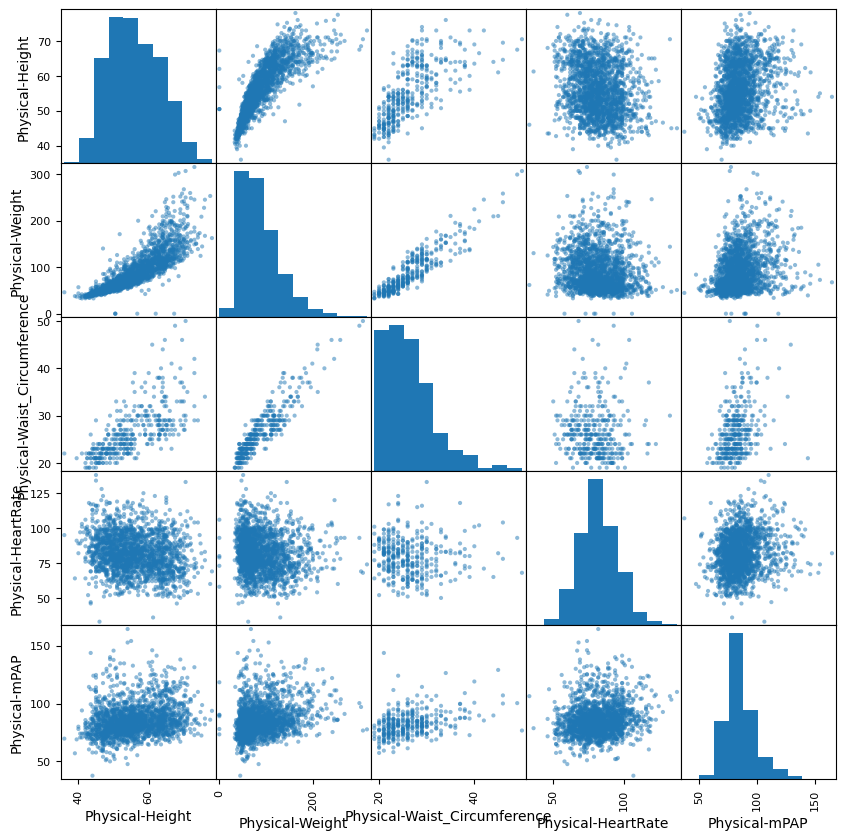

In [13]:
# PCA can only be used with linear data. So let's examine relationships between these five variables
from pandas.plotting import scatter_matrix
scatter_matrix(train[physical_vars], figsize=(10,10))
plt.show()

# I'm now wondering what "only be used with linear data" means. "Linear" refers to a relationship between variables
# So how would we identify whether or not PCA can be used?

In [ ]:
# Instantiate a new PCA object
pca = PCA()

# Define the data to apply PCA to:
X = train[physical_vars]

# PCA requires data to be centered at 0, so we need to first scale the data
# We'll do this using a pipe that standardizes the data (X) and fits a PCA with two components
pipe = Pipeline([('scaler', StandardScaler)])